**1 Data analysis**
1. Load the data and show its summary. How many samples and inputs do we have?


In [1]:
import pandas as pd
import numpy as np
link = "/content/drive/MyDrive/préparation examen/TP-ML/winequality-white (1).csv"

df = pd.read_csv(link, header="infer", delimiter=";")
print("\n========= Dataset summary ========= \n")
df.info()
print("\n========= A few first samples ========= \n")
print(df.head())


========= Dataset summary ========= 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB

========= A few first samples ========= 

   fixed acidity  volatile acidity  citric a

2. Form the arrays X 2 RNd of the input variables and Y 2 RN the output. What are the
wine qualities and the related number of samples ?

In [2]:
X = df.drop("quality", axis=1) #we drop the column "quality"
Y = df["quality"]
print("\n========= Wine Qualities ========= \n")
print(Y.value_counts())


========= Wine Qualities ========= 

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64


3. To form a binary classification problem, we group the data by quality level.

In [3]:
# bad wine (y=0) : quality <= 5 and good quality (y= 1) otherwise
Y = [0 if val <=5 else 1 for val in Y]

4. Perform a statistical analysis (mean, variance, correlation . . . ) of the input variables.
Comments on the results.

/tmp/ipython-input-503820607.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


<Axes: >

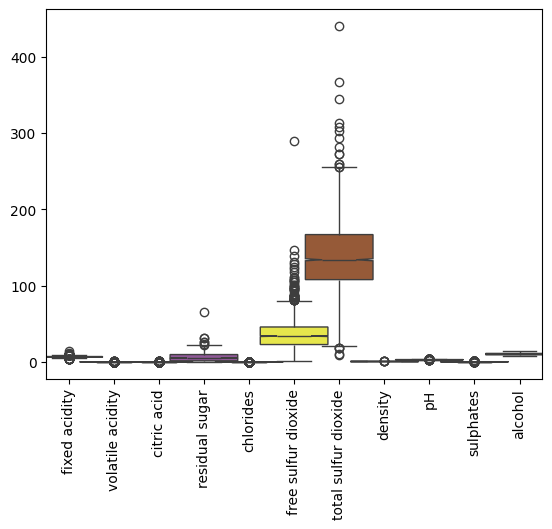

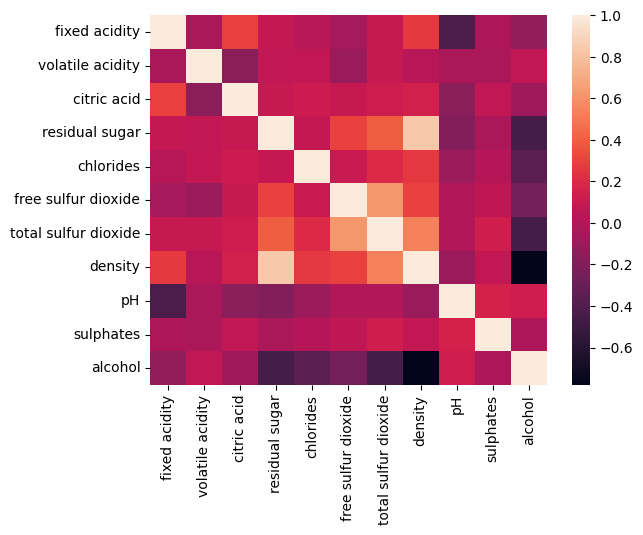

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
ax = plt.gca()
sns.boxplot(data=X,orient="v",palette="Set1",width=1.5, notch=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure()
corr = X.corr()
sns.heatmap(corr)

**2 Classification**

**2.1 Data split**
1. Randomly split-up (X; Y ) (keep the proportion of the labels) in three subsets Da =
(Xa; Ya), Dv = (Xv; Yv) and Dt = (Xt; Yt), respectively the training, validation and
test set.

In [6]:
from sklearn.model_selection import train_test_split
Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size=1/3,
stratify=Y)
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, shuffle=True, test_size=0.5,
stratify=Ya)

**2.2 k nearest neighbor (k-NN) classification**

k-NN uses the samples in (Xa; ya) as the reference data. Given any sample xi, the predicted
label is the majority label of its k 2 N neighbors in (Xa; ya). The neighbors are the ones close to
xi in terms of the Euclidean distance.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
# Fit the model on (Xa, Ya)
k = 3
clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(Xa, Ya)
# Predict the labels of samples in Xv
Ypred_v = clf.predict(Xv)
# evaluate classification error rate
from sklearn.metrics import accuracy_score
error_v = 1-accuracy_score(Yv, Ypred_v)

1. As a starter let run k-NN with k = 3 and evaluate its performance on Dv by the error rate
defined as

In [18]:
from sklearn.neighbors import KNeighborsClassifier
# Fit the model on (Xa, Ya)
k = 3
clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(Xa, Ya)
# Predict the labels of samples in Xv
Ypred_v = clf.predict(Xv)
# evaluate classification error rate
from sklearn.metrics import accuracy_score
error_v = 1-accuracy_score(Yv, Ypred_v)

2. Inspiring from that, train the k-nn classifier for different values of k 2 N (in the range
[1; 40]) and evaluate its performance either on training set and validation set. Plot the
training and validation error curves as a function of k. From the plots, point out the overfitting
issue.

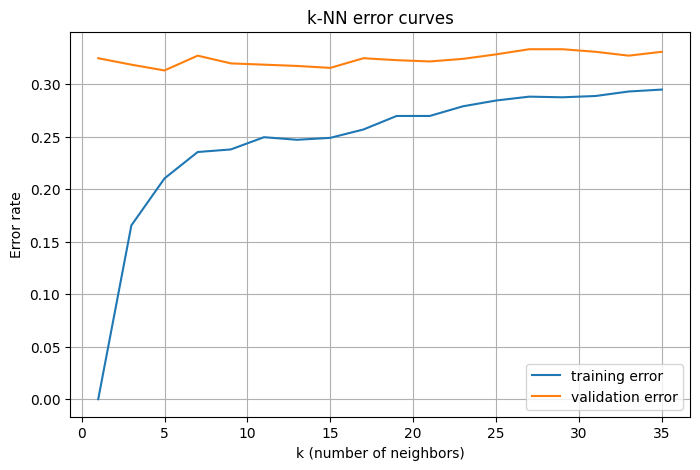

In [12]:
# some hints
k_vector = np.arange(1, 37, 2)   # define a vector of k = 1, 3, 5, ...
error_train = np.empty(k_vector.shape)
error_val = np.empty(k_vector.shape)

for ind, k in enumerate(k_vector):

    # fit with k
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(Xa, Ya)

    # ---------- PREDICT TRAIN SET ----------
    Ypred_train = clf.predict(Xa)
    error_train[ind] = 1 - accuracy_score(Ya, Ypred_train)

    # ---------- PREDICT VALIDATION SET ----------
    Ypred_val = clf.predict(Xv)
    error_val[ind] = 1 - accuracy_score(Yv, Ypred_val)


# --------- PLOT TRAIN + VALIDATION ERROR CURVES ----------
plt.figure(figsize=(8,5))
plt.plot(k_vector, error_train, label="training error")
plt.plot(k_vector, error_val, label="validation error")
plt.xlabel("k (number of neighbors)")
plt.ylabel("Error rate")
plt.title("k-NN error curves")
plt.legend()
plt.grid(True)
plt.show()

3. How to choose the appropriate value of k ? Select the best value k? of k based on the
validation error.

In [13]:
# some hints: get the min error and related k-value
err_min, ind_opt = error_val.min(), error_val.argmin()
k_star = k_vector[ind_opt]

4. For the selected k?, what is the error rate on the data test ? Discuss the obtained results.

**2.3 Normalize or not normalize the data ?**
1. So far, we have used the raw inputs without any normalization. To account for different
input scales we normalize the data by removing the mean value of each feature and scale
it by dividing by the standard deviation. Comment and explain the following codes. Is the
applied normalization to the validation set sound ?

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa_n = sc.transform(Xa)
Xv_n = sc.transform(Xv)